# Clasificación Básica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [2]:
dataset = keras.datasets.fashion_mnist
dataset.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset. Los guardamos en la siguiente lista:

## Explore el set de datos

* ¿Cuántas imágenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [3]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()

Dimensiones de X_train: (60000, 28, 28)
Dimensiones de y_train: (60000,)
Dimensiones de X_test: (10000, 28, 28)
Dimensiones de y_test: (10000,)
Cada imagen se compone de 784 pixels.
Rango de los valores de los píxeles: 0 - 255
Los valores de los labels son: [0 1 2 3 4 5 6 7 8 9]


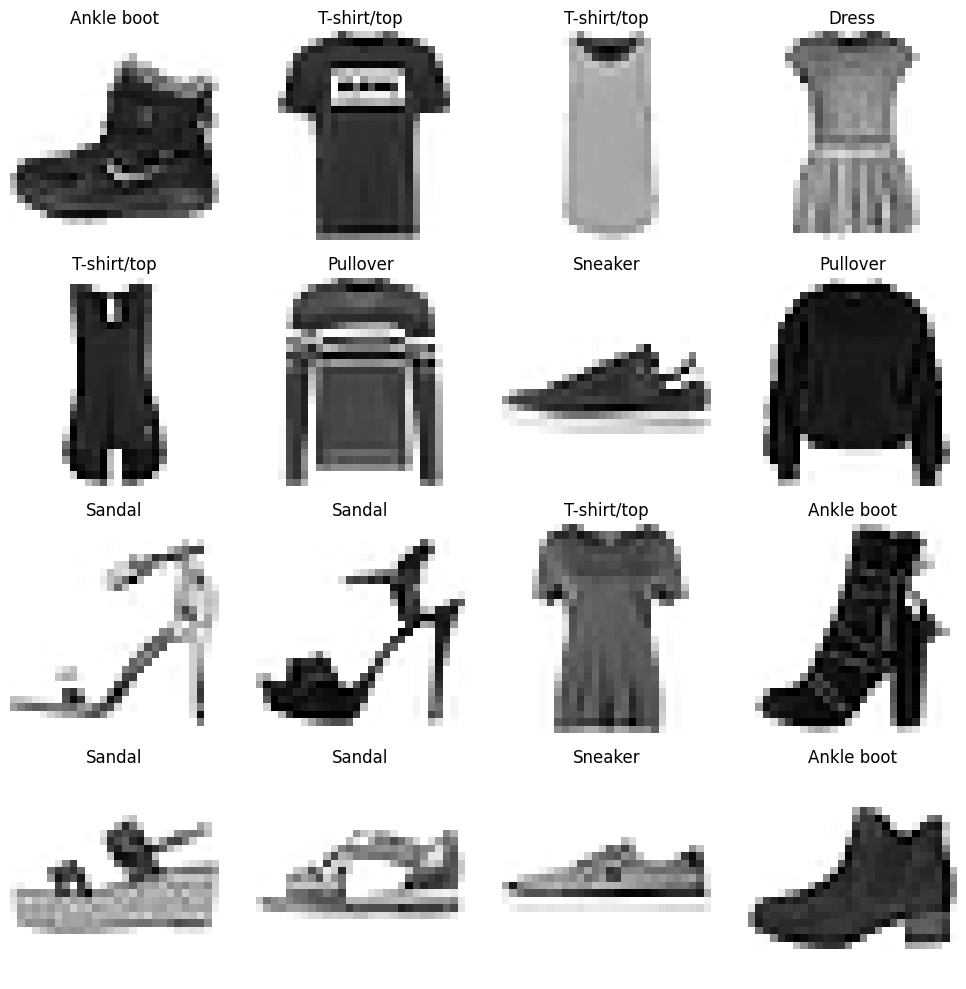

In [ ]:

print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de y_train: {y_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")
print(f"Dimensiones de y_test: {y_test.shape}")

# Número de pixeles por imagen
image_dimensions = X_train.shape[1:]  # Get the dimensions of a single image
num_pixels = image_dimensions[0] * image_dimensions[1]
print(f"Cada imagen se compone de {num_pixels} pixels.")

# Sacar los valores únicos de y_train
unique_labels = np.unique(y_train)
print(f"Los valores de los labels son: {unique_labels}")

# Define class names if not already defined
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualización de algunas imágenes del dataset
plt.figure(figsize=(10, 10))
for i in range(16):  # Mostrar las primeras 16 imágenes
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[i], cmap="binary")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()

## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

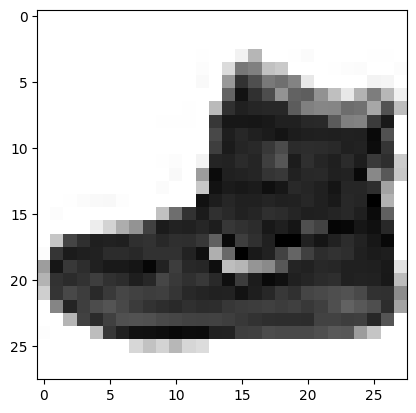

In [7]:
plt.imshow(X_train[0], cmap="binary")

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [8]:
# Escalar los conjuntos de train y test
X_train = X_train / 255.0
X_test = X_test / 255.0

Para verificar que el set de datos está en el formato adecuado y que están listos para construir y entrenar la red, vamos a desplegar las primeras 25 imágenes del *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

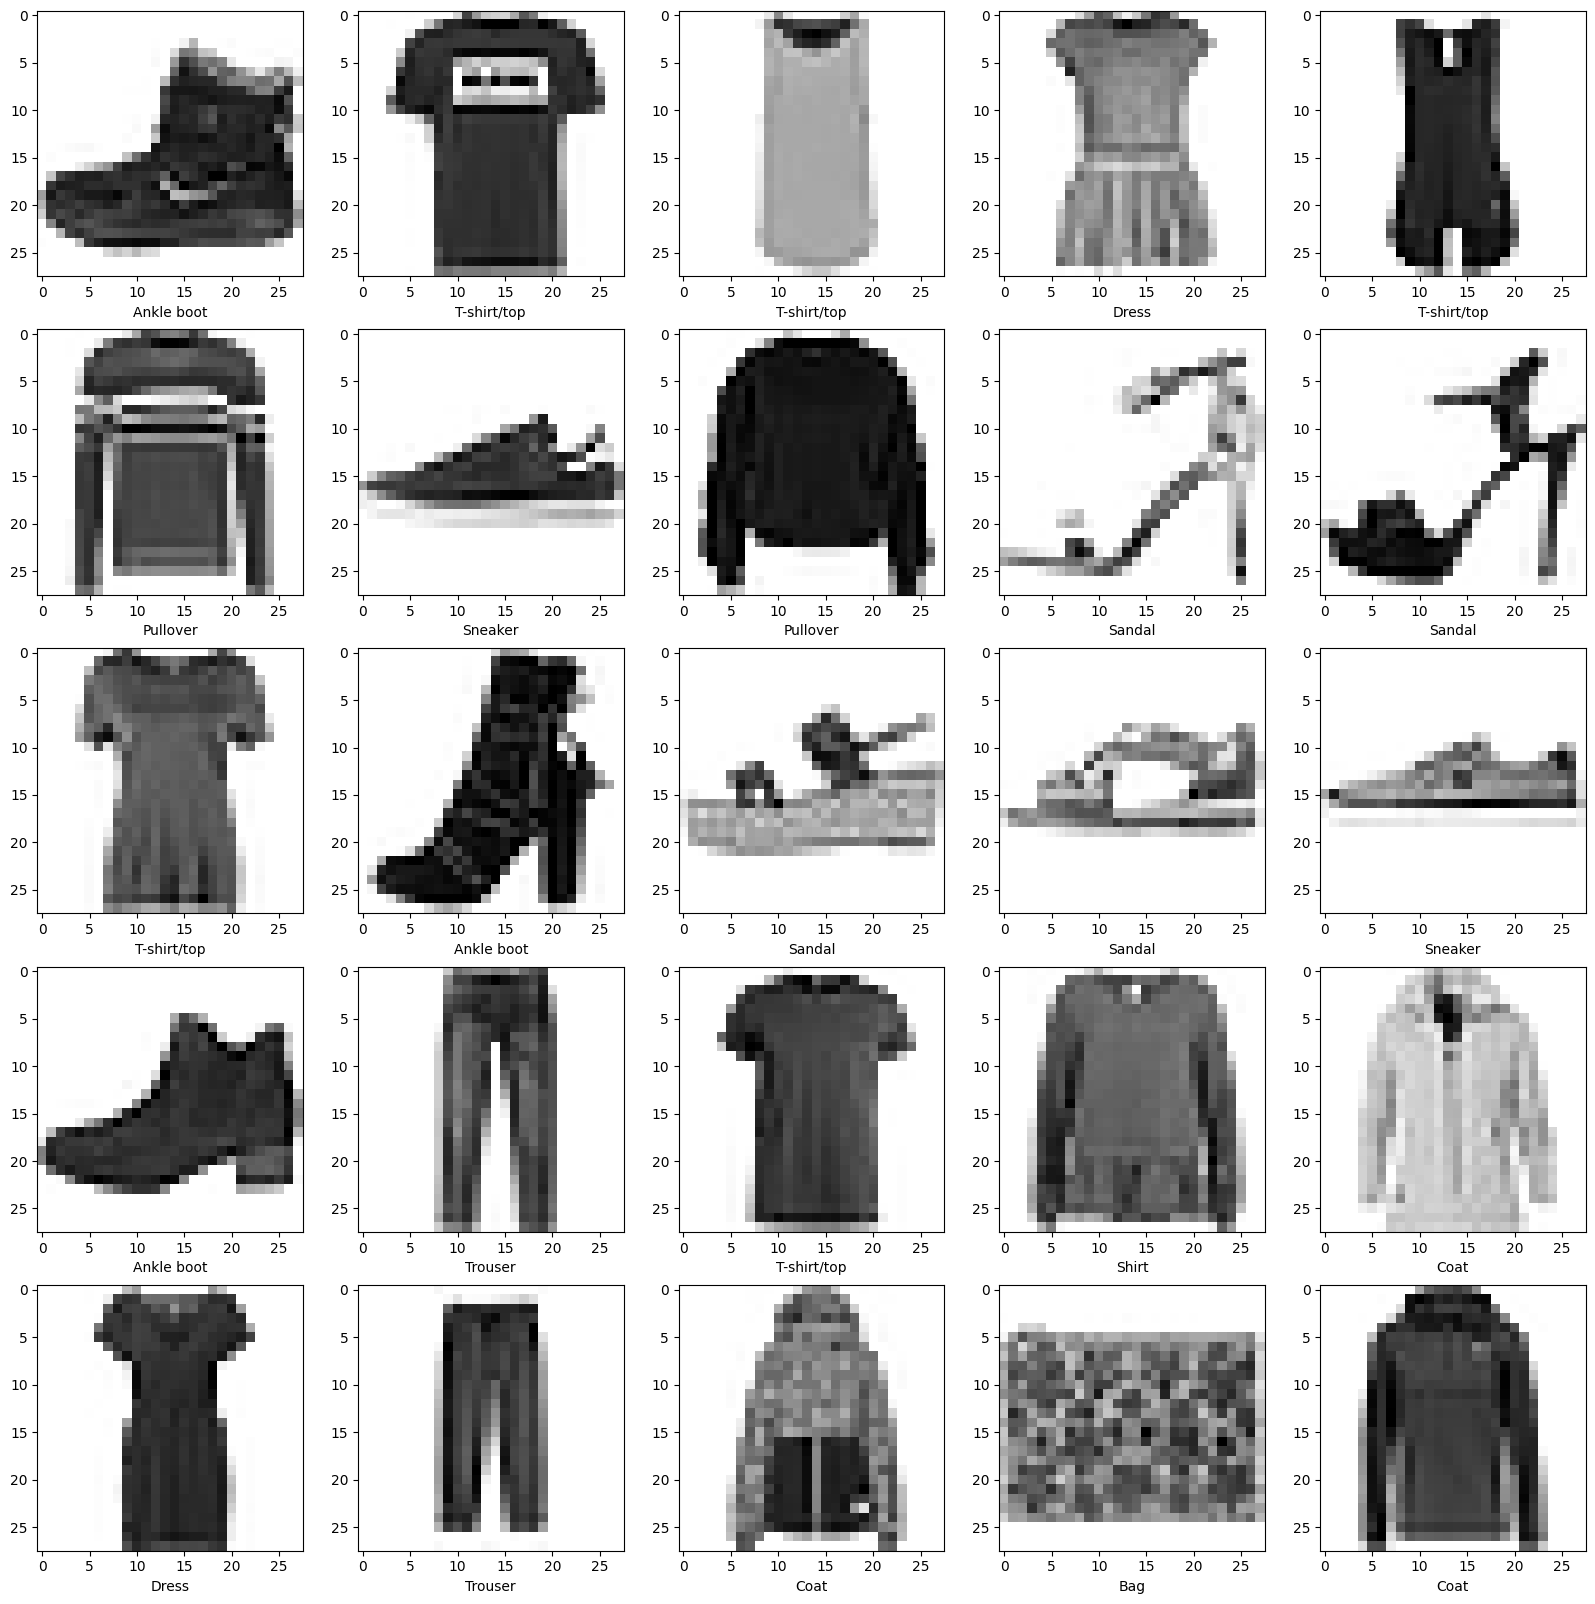

In [9]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train[i], cmap="binary")
    plt.xlabel(class_names[y_train[i]])

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [14]:
# Configurar las capas del modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Convierte las imágenes 2D en un array 1D
    keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas y activación ReLU
    keras.layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por clase) y activación softmax
])


### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta función para dirigir el modelo en la dirección adecuada.
* *Optimizer* — Esto es cómo el modelo aprende basado en el set de datos que ve y la función de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [15]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [16]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7854 - loss: 0.6170 - val_accuracy: 0.8521 - val_loss: 0.4206
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8645 - loss: 0.3783 - val_accuracy: 0.8628 - val_loss: 0.3812
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8746 - loss: 0.3394 - val_accuracy: 0.8643 - val_loss: 0.3775
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8861 - loss: 0.3083 - val_accuracy: 0.8709 - val_loss: 0.3525
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8910 - loss: 0.2929 - val_accuracy: 0.8685 - val_loss: 0.3712
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8962 - loss: 0.2778 - val_accuracy: 0.8827 - val_loss: 0.3285
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9017 - loss: 0.2609 - val_accuracy: 0.8784 - val_loss: 0.3384
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9055 - loss: 0.2535 - 

In [17]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9144 - loss: 0.2293 - val_accuracy: 0.8826 - val_loss: 0.3278
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9180 - loss: 0.2185 - val_accuracy: 0.8796 - val_loss: 0.3530
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9199 - loss: 0.2141 - val_accuracy: 0.8773 - val_loss: 0.3846
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9215 - loss: 0.2072 - val_accuracy: 0.8882 - val_loss: 0.3360
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9245 - loss: 0.2026 - val_accuracy: 0.8838 - val_loss: 0.3493
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9294 - loss: 0.1906 - val_accuracy: 0.8801 - val_loss: 0.3532
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9276 - loss: 0.1924 - val_accuracy: 0.8881 - val_loss: 0.3519
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9299 - loss: 0.1843 - 

In [18]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9498 - loss: 0.1350 - val_accuracy: 0.8924 - val_loss: 0.3954
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9499 - loss: 0.1326 - val_accuracy: 0.8857 - val_loss: 0.4157
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9478 - loss: 0.1330 - val_accuracy: 0.8914 - val_loss: 0.4110
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9522 - loss: 0.1263 - val_accuracy: 0.8943 - val_loss: 0.4155
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9528 - loss: 0.1253 - val_accuracy: 0.8950 - val_loss: 0.4211
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9554 - loss: 0.1174 - val_accuracy: 0.8917 - val_loss: 0.4121
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9544 - loss: 0.1239 - val_accuracy: 0.8894 - val_loss: 0.4436
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9563 - loss: 0.1144 - 

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss en test: {test_loss}")
print(f"Accuracy en test: {test_accuracy}")

313/313 - 0s - 1ms/step - accuracy: 0.8918 - loss: 0.5329
Loss en test: 0.5329449772834778
Accuracy en test: 0.8917999863624573


## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [20]:
# Hacer predicciones sobre el conjunto de test
predictions = model.predict(X_test)

# Mostrar la predicción para la primera imagen
print(f"Predicción para la primera imagen: {predictions[0]}")
print(f"Clase predicha: {np.argmax(predictions[0])} ({class_names[np.argmax(predictions[0])]})")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicción para la primera imagen: [1.0521094e-10 2.1909764e-27 4.4433909e-17 1.0106762e-20 8.8108733e-20
 5.5042342e-13 5.4105412e-22 1.7326487e-05 1.4497902e-17 9.9998271e-01]
Clase predicha: 9 (Ankle boot)


El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [21]:
# Mostrar la predicción para la primera imagen
print(f"Predicción para la primera imagen: {predictions[0]}")
print(f"Clase predicha: {np.argmax(predictions[0])} ({class_names[np.argmax(predictions[0])]})")

# Mostrar la etiqueta real de la primera imagen
print(f"Etiqueta real: {y_test[0]} ({class_names[y_test[0]]})")

Predicción para la primera imagen: [1.0521094e-10 2.1909764e-27 4.4433909e-17 1.0106762e-20 8.8108733e-20
 5.5042342e-13 5.4105412e-22 1.7326487e-05 1.4497902e-17 9.9998271e-01]
Clase predicha: 9 (Ankle boot)
Etiqueta real: 9 (Ankle boot)


*Una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [22]:
# Obtener la predicción con el nivel más alto de confianza para la primera imagen
prediccion_maxima = np.argmax(predictions[0])
print(f"Clase con mayor confianza: {prediccion_maxima} ({class_names[prediccion_maxima]})")
print(f"Nivel de confianza: {predictions[0][prediccion_maxima]}")

Clase con mayor confianza: 9 (Ankle boot)
Nivel de confianza: 0.9999827146530151


Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:

In [23]:
# Verificar si la predicción del modelo para la primera imagen es correcta
predicted_label = np.argmax(predictions[0])
actual_label = y_test[0]

if predicted_label == actual_label:
    print(f"La predicción es correcta: {class_names[predicted_label]}")
else:
    print(f"La predicción es incorrecta. Predicho: {class_names[predicted_label]}, Real: {class_names[actual_label]}")

La predicción es correcta: Ankle boot


**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

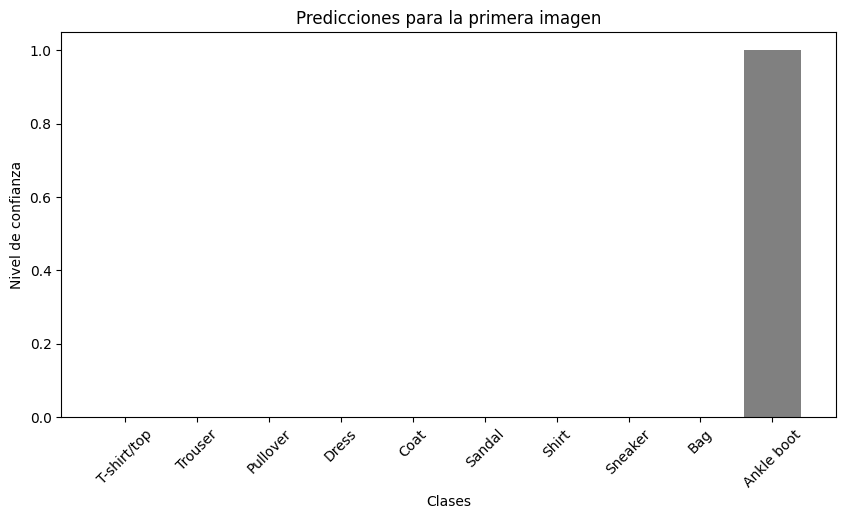

In [24]:
# Graficar las predicciones para la primera imagen
plt.figure(figsize=(10, 5))
plt.bar(range(10), predictions[0], color='gray')
plt.xticks(range(10), class_names, rotation=45)
plt.ylabel("Nivel de confianza")
plt.xlabel("Clases")
plt.title("Predicciones para la primera imagen")
plt.show()

Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de predicción correctas estan en azul y las incorrectas están en rojo. El número entrega el porcentaje (sobre 100) para la etiqueta predecida.

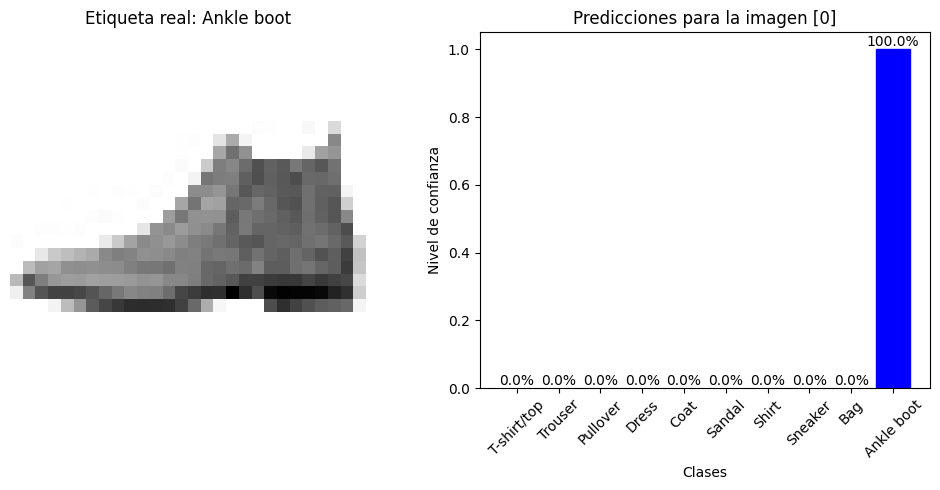

In [25]:
# Visualizar la imagen [0] con sus predicciones
plt.figure(figsize=(10, 5))

# Mostrar la imagen
plt.subplot(1, 2, 1)
plt.imshow(X_test[0], cmap="binary")
plt.title(f"Etiqueta real: {class_names[actual_label]}")
plt.axis("off")

# Graficar las predicciones
plt.subplot(1, 2, 2)
bars = plt.bar(range(10), predictions[0], color='gray')
plt.xticks(range(10), class_names, rotation=45)
plt.ylabel("Nivel de confianza")
plt.xlabel("Clases")
plt.title("Predicciones para la imagen [0]")

# Colorear las barras: azul para la predicción correcta, rojo para las incorrectas
for i, bar in enumerate(bars):
    if i == actual_label:
        bar.set_color('blue')  # Etiqueta correcta
    elif i == np.argmax(predictions[0]):
        bar.set_color('red')  # Predicción incorrecta

# Mostrar el porcentaje de confianza sobre cada barra
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f"{predictions[0][i] * 100:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

Evalúa tu modelo con una matriz de confusión e interprétala.

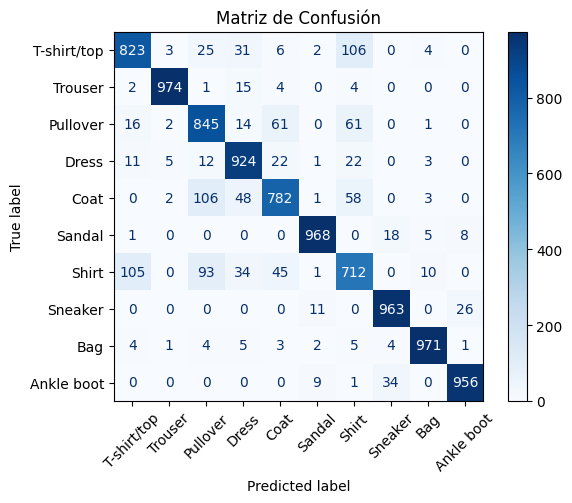

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtener las etiquetas predichas para el conjunto de test
y_pred = np.argmax(predictions, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Matriz de Confusión")
plt.show()

- Las filas representan las clases reales
- Las columnas representan las predicciones del modelo
- Los números en la diagonal principal (de arriba a abajo) son los aciertos del modelo
- Los números fuera de la diagonal son errores de clasificación
----
- Mejores clasificaciones:
    - "Trouser" (974 aciertos) y "Sandal" (968 aciertos) son las clases con mejor clasificación
    - "Bag" (971 aciertos) y "Sneaker" (963 aciertos) también tienen muy buen desempeño
----
- Mayores confusiones:
    - "Shirt" es frecuentemente confundido con "T-shirt/top" (105 errores) y "Pullover" (93 errores)
    - "Coat" tiene muchas confusiones con "Pullover" (106 errores)
    - "Pullover" también se confunde con "Coat" (61 errores) y "Shirt" (61 errores)
    - "T-shirt/top" tiene varios errores clasificados como "Shirt" (106 errores)
---
- El modelo tiene dificultad para distinguir entre prendas superiores con formas similares
- Las prendas con formas más distintivas (pantalones, bolsos, zapatos) se clasifican mejor

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una única imagen.

In [29]:
# Seleccionar una única imagen del conjunto de prueba
single_image = X_test[0]

# Expandir las dimensiones de la imagen para que sea compatible con el modelo
single_image = np.expand_dims(single_image, axis=0)

# Hacer la predicción
single_prediction = model.predict(single_image)

# Mostrar la predicción
predicted_class = np.argmax(single_prediction[0])
print(f"Clase predicha: {predicted_class} ({class_names[predicted_class]})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Clase predicha: 9 (Ankle boot)
